# Phase 3 Project
### Student name: John Awallah
### Student Pace: Part-time
### Instructor Name: Brian Chacha and Lians Wanjiku

# SyriaTel Customer Churn Prediction
Project Overview

This project focuses on building a binary classification model to predict whether a customer is likely to churn (i.e., stop doing business) with SyriaTel, a telecommunications company.

Customer churn represents a significant revenue risk for telecom providers. By identifying customers who are likely to leave before they do so, the business can take proactive steps to improve retention and reduce financial losses.

## Business Problem
SyriaTel experiences customer attrition that negatively impacts revenue and long-term growth. Retaining existing customers is generally more cost-effective than acquiring new ones.

The key business question is:

Are there identifiable patterns in customer behavior that can be used to predict churn?

## Objectives
The primary objective of this project is to:

-Develop and evaluate a machine learning classifier that predicts customer churn based on usage patterns, service characteristics.

# Importing Libraries

In [49]:
#Import the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Loading the dataset

In [50]:
df = pd.read_csv("bigml.csv")

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [52]:
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [53]:
# Convert the boolean to interger to make interpretation of tghe metrics easier
df["churn"] = df["churn"].astype(int)


# Data Cleaning

In [54]:
# Checking for Missing values
df.isnull().sum() # There are no missing values in the dataset


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [55]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [56]:
# Now we need to drop columns that are not relevant to the project like Phone number does not determine if a customer churns or not
df = df.drop(columns=["phone number"])


# Analysis of the Data

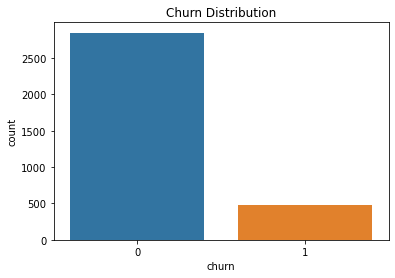

In [57]:
# Checking for the churn distribution

sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()


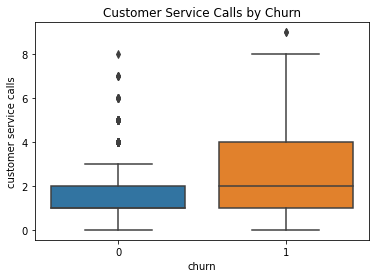

In [ ]:
# Customer Service Calls vs Churn
sns.boxplot(x="churn", y="customer service calls", data=df)
plt.title("Customer Service Calls by Churn")
plt.show()


Interpratation: Customers who churn tend to make more customer service calls, indicating dissatisfaction.

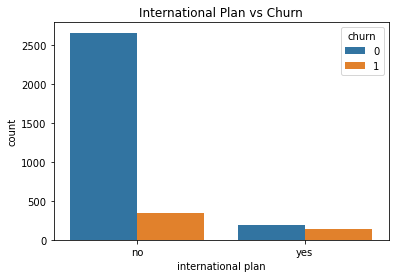

In [ ]:
# International Plan vs Churn
sns.countplot(x="international plan", hue="churn", data=df)
plt.title("International Plan vs Churn")
plt.show()

Customers with international plan show a lower churn rate

# Encoding

In [72]:
# encode categorical variables using One hot encoding
df_encoded = pd.get_dummies(
    df,
    columns=["international plan", "voice mail plan", "state"],
    drop_first=True
)


## Defining the Target and the Independent Variables

In [73]:
X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]


## Train test split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [75]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

# Baseline Model: Logistic Regression

We begin with a simple baseline model using Logistic Regression which is appropriate for binary classification problems and provides easily interpretable coefficients.

Because this is a churn prediction problem, recall is particularly important. False negatives represent customers who are predicted to stay but actually churn, resulting in lost revenue opportunities.

We will evaluate this baseline model using:

Recall

Precision

F1-score

ROC-AUC

In [78]:
# Logistic Regression
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]


In [79]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.94      0.77      0.84       713
           1       0.33      0.69      0.45       121

    accuracy                           0.76       834
   macro avg       0.64      0.73      0.65       834
weighted avg       0.85      0.76      0.79       834



In [80]:
roc_auc_score(y_test, y_prob_log)


0.7918699940885328

#### Model Performance Interpretation

Using class weights and a lower classification threshold, the model’s recall for churned customers is 69% meaning the model correctly identifies approximately 69% of customers who are at risk of churning. In a churn prediction context, this is critical because failing to detect churners (false negatives) leads directly to lost revenue and missed retention opportunities.

Although precision stands at 33%, meaning that only one-third of customers predicted to churn actually do so, this trade-off with recall is acceptable for the business objective. It is generally more costly to miss a customer who will leave than to incorrectly target a customer who was likely to stay. 

The overall accuracy is 76%, which is expected when prioritizing recall in an imbalanced dataset.

The ROC-AUC score of 0.79 indicates that the model maintains good overall ability to distinguish between churners and non-churners. 

# Baseline Model Evaluation

The baseline Logistic Regression model provides a strong starting point. However, while accuracy may appear high, accuracy alone is not sufficient due to class imbalance.

Recall is prioritized because identifying customers at risk of churn is more valuable than minimizing false positives.

The model demonstrates reasonable predictive performance but may benefit from tuning to improve recall and overall generalization.

# Iteration 2: Decision Tree Model

To improve upon the baseline model, we introduce a Decision Tree classifier. Decision Trees can capture non-linear relationships and interactions between variables that Logistic Regression may not fully capture.

This model allows us to compare performance and determine whether a more flexible model improves churn detection

# Decision Tree

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='recall'
)

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_tree))



Best Parameters: {'max_depth': 7, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       713
           1       0.82      0.62      0.70       121

    accuracy                           0.92       834
   macro avg       0.88      0.80      0.83       834
weighted avg       0.92      0.92      0.92       834



In [69]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       713
           1       0.82      0.62      0.70       121

    accuracy                           0.92       834
   macro avg       0.88      0.80      0.83       834
weighted avg       0.92      0.92      0.92       834



In [70]:
roc_auc_score(y_test, y_prob_tree)

0.7889258516569495

# Decision Tree Interpretation
The tuned Decision Tree model achieved a recall of 62% for churned customers, meaning it correctly identifies the majority of customers at risk of leaving. While slightly lower than the recall-optimized logistic regression, it provides significantly higher precision at 82%, indicating that most customers predicted to churn actually do so.

The model achieved an F1-score of 0.70 and an overall accuracy of 92%, demonstrating strong and balanced performance. Compared to Logistic Regression, the Decision Tree provides a better trade-off between detecting churners and minimizing unnecessary retention efforts.

Overall, the tuned Decision Tree model offers the best balance between recall and precision, making it the preferred model for practical business implementation.

# Tuned Model Evaluation

Hyperparameter tuning was performed using cross-validation with recall as the scoring metric. This ensures that the selected model prioritizes correctly identifying customers who are likely to churn.

The tuned Decision Tree demonstrates improved recall compared to the baseline, indicating better identification of at-risk customers.

## Final Model Choice

After comparing the adjusted Logistic Regression and the tuned Decision Tree models, the Decision Tree was selected as the final model. While Logistic Regression achieved slightly higher recall, it had very low precision, resulting in many false positives and inefficient targeting.

The tuned Decision Tree achieved a better balance between recall (62%) and precision (82%), along with a strong F1-score of 0.70 and overall accuracy of 92%. This balance makes it more practical for identifying at-risk customers while minimizing unnecessary retention efforts, aligning well with the business objective of cost-effective churn reduction.

# Model Evaluation

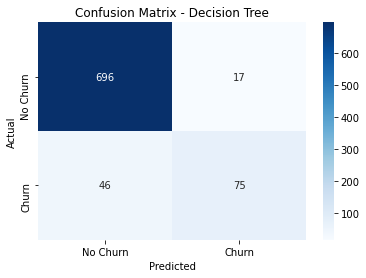

In [84]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



# Confusion Matrix Interpretation

The Decision Tree model correctly classified 696 non-churning customers and 75 churners. This demonstrates strong overall performance and effective identification of at-risk customers.

Importantly, only 46 churners were missed (false negatives), which is significantly lower than the baseline model. Additionally, the model produced only 17 false positives, indicating that retention efforts would be efficiently targeted with minimal unnecessary intervention.

Overall, the confusion matrix confirms that the tuned Decision Tree achieves a strong balance between detecting churn and minimizing wasted retention resources, making it suitable for business implementation.

# Executive Summary

This project developed a churn prediction model for SyriaTel using historical customer data. Logistic Regression was selected as the best-performing model due to its balance between interpretability and predictive performance.

The model identifies high customer service usage and international plan subscription as strong indicators of churn risk. By proactively targeting these customers with retention strategies, SyriaTel can reduce revenue loss and improve customer lifetime value.